<a href="https://colab.research.google.com/github/svarunkishore/Adaptive_Cyber_Defence_System/blob/main/Model_Comparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 11.4 MB/s eta 0:00:00


PCA REDUCTION - SVM

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.957 total time=   0.9s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.955 total time=   0.9s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.961 total time=   1.5s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.967 total time=   1.7s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.965 total time=   1.3s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.957 total time=   1.3s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.955 total time=   0.9s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.961 total time=   0.9s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.967 total time=   0.9s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.965 total time=   0.9s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.957 total time=   0.9s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;

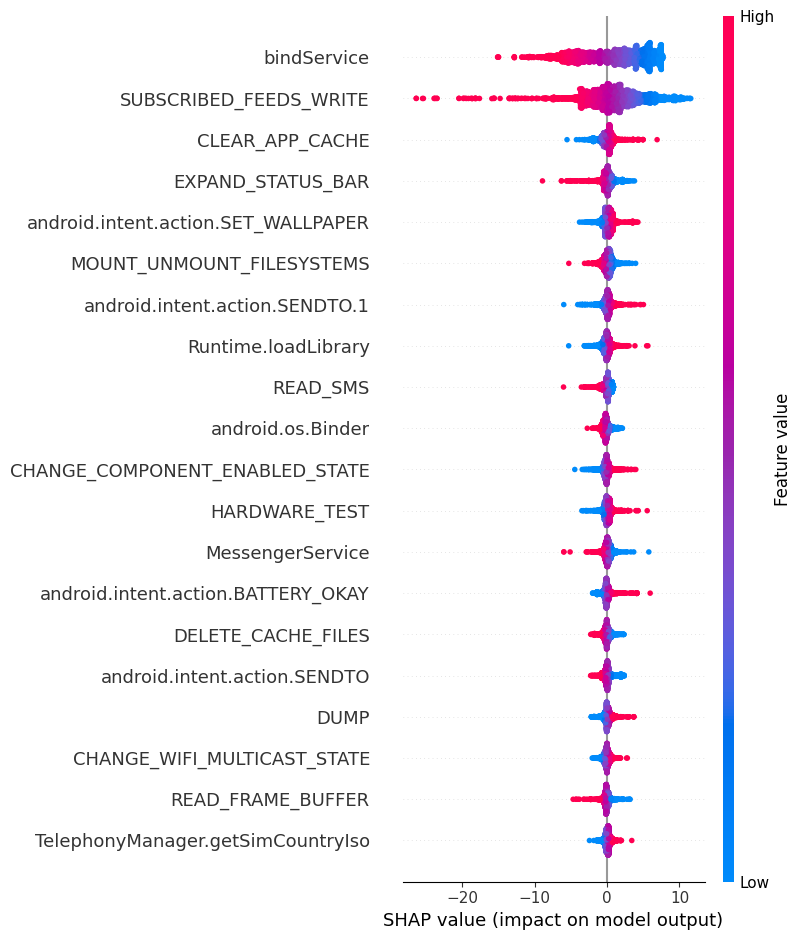

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import shap
import numpy as np

# Load your dataset
dataset_df = pd.read_csv('/content/new_dataset50_with_titles.csv')
Y = dataset_df['class']
X = dataset_df.drop(['class'], axis=1)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear']  # Make sure your model is a linear kernel SVM
}

# Perform GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

# Print the best parameters
print(grid.best_params_)

# Make predictions with the best model
grid_predictions = grid.predict(X_test)

# Print classification report
print(classification_report(y_test, grid_predictions))

# Create a LinearExplainer for the best model (for linear kernel SVM)
explainer = shap.LinearExplainer(grid.best_estimator_, X_train)

# Generate SHAP values for your model
shap_values = explainer.shap_values(X_test)

# Plot the summary plot
shap.summary_plot(shap_values, X_test)

feature_importance = np.abs(shap_values).mean(axis=0)

# Get the indices of the features sorted by importance
sorted_feature_indices = np.argsort(feature_importance)[::-1]

# Print the top most feature
top_feature_index = sorted_feature_indices[0]
top_feature_name = X_test.columns[top_feature_index]
print(f"Top most important feature: {top_feature_name}")




PCA REDUCTION - ANN

Epoch 1/100
376/376 [==============================] - 2s 2ms/step - loss: 0.3460 - accuracy: 0.8537
Epoch 2/100
376/376 [==============================] - 1s 2ms/step - loss: 0.1541 - accuracy: 0.9460
Epoch 3/100
376/376 [==============================] - 1s 2ms/step - loss: 0.1288 - accuracy: 0.9550
Epoch 4/100
376/376 [==============================] - 1s 3ms/step - loss: 0.1183 - accuracy: 0.9586
Epoch 5/100
376/376 [==============================] - 1s 4ms/step - loss: 0.1120 - accuracy: 0.9618
Epoch 6/100
376/376 [==============================] - 1s 3ms/step - loss: 0.1037 - accuracy: 0.9650
Epoch 7/100
376/376 [==============================] - 1s 2ms/step - loss: 0.0997 - accuracy: 0.9663
Epoch 8/100
376/376 [==============================] - 1s 2ms/step - loss: 0.0934 - accuracy: 0.9677
Epoch 9/100
376/376 [==============================] - 1s 2ms/step - loss: 0.0917 - accuracy: 0.9670
Epoch 10/100
376/376 [==============================] - 1s 3ms/step - loss: 0.0889 - accura

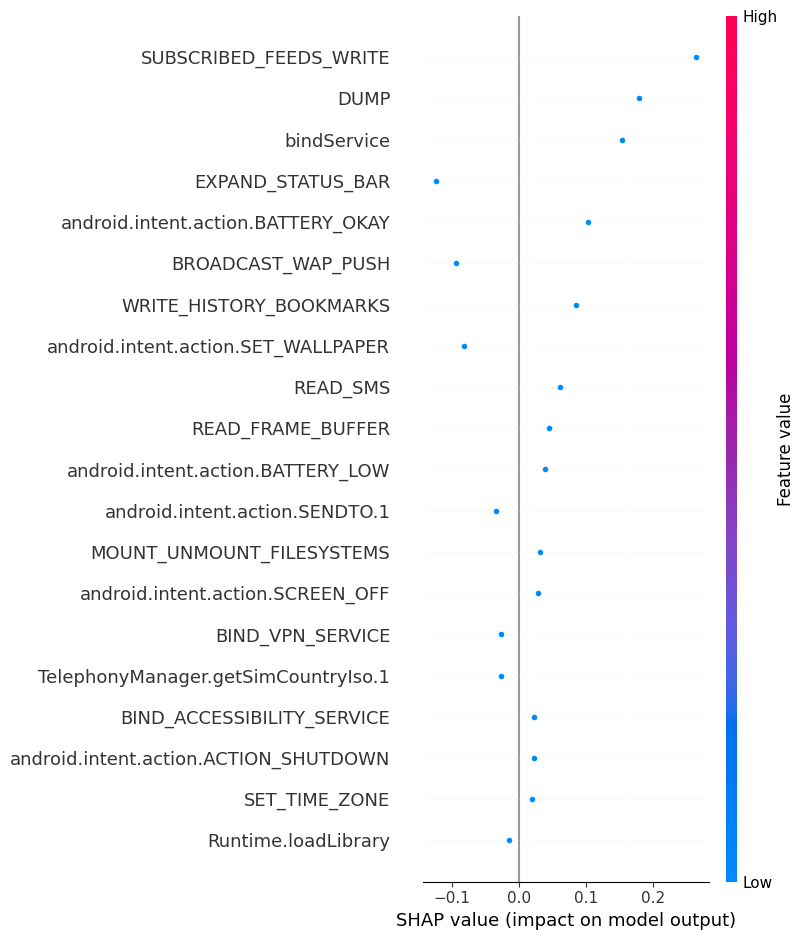

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import shap

# Load your dataset
dataset_df = pd.read_csv('/content/new_dataset50_with_titles.csv')

# Preprocess your data and split into features (X) and labels (Y)
Y = dataset_df['class']
X = dataset_df.drop(['class'], axis=1)

encoder = LabelEncoder().fit(Y)
Y = encoder.transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
features = X.columns
num_features = len(features)

# Define and train your Keras model using the TensorFlow backend
AN = tf.keras.Sequential()
AN.add(tf.keras.layers.Dense(256, activation='relu', input_dim=num_features))
AN.add(tf.keras.layers.Dropout(0.2))
AN.add(tf.keras.layers.Dense(128, activation='relu'))
AN.add(tf.keras.layers.Dropout(0.2))
AN.add(tf.keras.layers.Dense(128, activation='relu'))
AN.add(tf.keras.layers.Dropout(0.2))
AN.add(tf.keras.layers.Dense(32, activation='relu'))
AN.add(tf.keras.layers.Dropout(0.2))
AN.add(tf.keras.layers.Dense(1, activation='sigmoid'))
AN.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
AN.fit(X_train, y_train, epochs=100, batch_size=32)

# Convert your data to NumPy arrays for predictions
X_test_array = X_test.to_numpy()

# Use your Keras model to predict
predicted_probabilities = AN.predict(X_test_array)

# Calculate and print the classification report
y_pred = AN.predict(X_test_array)
y_pred_binary = (y_pred > 0.5).astype(int)

report = classification_report(y_test, y_pred_binary, target_names=['benign', 'malign'])
print(report)

# Create an explainer for your Keras model
explainer = shap.Explainer(AN, X_train.to_numpy())

# Select an instance from the test set for explanation
instance_idx = 0  # Choose any index
instance_to_explain = X_test_array[[instance_idx]]

# Explain the predictions for the selected instance
shap_values = explainer.shap_values(instance_to_explain)

# Display the SHAP values for the instance with feature names
shap.summary_plot(shap_values, instance_to_explain, feature_names=features)


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load your dataset
# Assuming you have a column named 'class' for binary classification and numerical features
dataset_df = pd.read_csv('/content/new_dataset50_with_titles.csv')

# Assuming you have a column named 'class' for binary classification
Y = dataset_df['class']
X_numerical = dataset_df.drop(['class'], axis=1)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numerical, Y, test_size=0.2, random_state=42)

# Build LSTM model
embedding_dim = 50  # Adjust based on your data
lstm_units = 50  # Adjust based on your data

model = Sequential()
model.add(LSTM(units=lstm_units, input_shape=(X_train.shape[1], 1)))  # Assuming you have one feature per time step
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape the input data for LSTM
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Apply a threshold (e.g., 0.5) for binary classification
print(classification_report(y_test, y_pred))


Epoch 1/100
301/301 [==============================] - 67s 25ms/step - loss: 0.5482 - accuracy: 0.7224 - val_loss: 0.3426 - val_accuracy: 0.8770
Epoch 2/100
301/301 [==============================] - 6s 20ms/step - loss: 0.3217 - accuracy: 0.8723 - val_loss: 0.2666 - val_accuracy: 0.8986
Epoch 3/100
301/301 [==============================] - 7s 24ms/step - loss: 0.2693 - accuracy: 0.8983 - val_loss: 0.2100 - val_accuracy: 0.9206
Epoch 4/100
301/301 [==============================] - 6s 20ms/step - loss: 0.2403 - accuracy: 0.9088 - val_loss: 0.2174 - val_accuracy: 0.9169
Epoch 5/100
301/301 [==============================] - 7s 22ms/step - loss: 0.2215 - accuracy: 0.9169 - val_loss: 0.1969 - val_accuracy: 0.9219
Epoch 6/100
301/301 [==============================] - 6s 21ms/step - loss: 0.2044 - accuracy: 0.9242 - val_loss: 0.2185 - val_accuracy: 0.9140
Epoch 7/100
301/301 [==============================] - 7s 23ms/step - loss: 0.2024 - accuracy: 0.9227 - val_loss: 0.1699 - val_accuracy

In [15]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Apply a threshold (e.g., 0.5) for binary classification
print(classification_report(y_test, y_pred))

94/94 [==============================] - 2s 11ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1863
           1       0.97      0.94      0.95      1145

    accuracy                           0.97      3008
   macro avg       0.97      0.96      0.96      3008
weighted avg       0.97      0.97      0.97      3008



RANDOM FOREST REDUCTION - SVM

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.958 total time=   0.7s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.953 total time=   0.6s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.958 total time=   0.7s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.962 total time=   1.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.960 total time=   1.6s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.958 total time=   2.4s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.953 total time=   0.9s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.958 total time=   1.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.962 total time=   1.1s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.960 total time=   0.9s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.958 total time=   1.1s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;

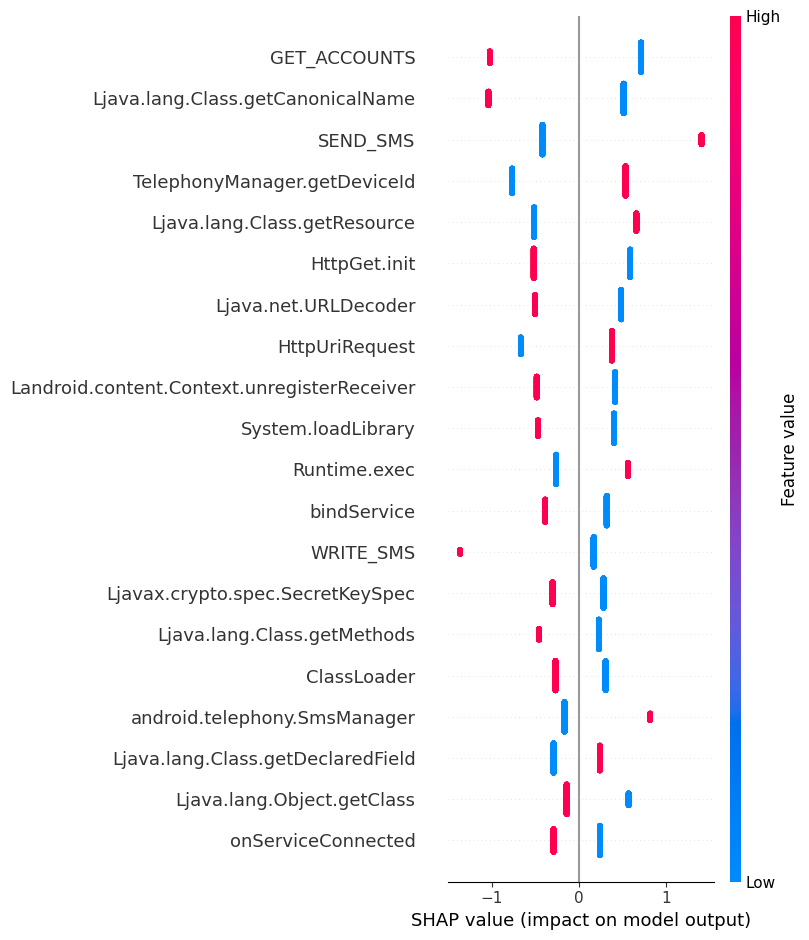

Top most important feature: GET_ACCOUNTS


In [2]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import shap
import numpy as np

# Load your dataset
dataset_df = pd.read_csv('/content/new_dataset_rf (1).csv')
Y = dataset_df['class']
X = dataset_df.drop(['class'], axis=1)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear']  # Make sure your model is a linear kernel SVM
}

# Perform GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

# Print the best parameters
print(grid.best_params_)

# Make predictions with the best model
grid_predictions = grid.predict(X_test)

# Print classification report
print(classification_report(y_test, grid_predictions))

# Create a LinearExplainer for the best model (for linear kernel SVM)
explainer = shap.LinearExplainer(grid.best_estimator_, X_train)

# Generate SHAP values for your model
shap_values = explainer.shap_values(X_test)

# Plot the summary plot
shap.summary_plot(shap_values, X_test)

feature_importance = np.abs(shap_values).mean(axis=0)

# Get the indices of the features sorted by importance
sorted_feature_indices = np.argsort(feature_importance)[::-1]

# Print the top most feature
top_feature_index = sorted_feature_indices[0]
top_feature_name = X_test.columns[top_feature_index]
print(f"Top most important feature: {top_feature_name}")




Epoch 1/100
376/376 [==============================] - 2s 2ms/step - loss: 0.4502 - accuracy: 0.8087
Epoch 2/100
376/376 [==============================] - 1s 2ms/step - loss: 0.2269 - accuracy: 0.9258
Epoch 3/100
376/376 [==============================] - 1s 2ms/step - loss: 0.1833 - accuracy: 0.9396
Epoch 4/100
376/376 [==============================] - 1s 2ms/step - loss: 0.1615 - accuracy: 0.9477
Epoch 5/100
376/376 [==============================] - 1s 2ms/step - loss: 0.1429 - accuracy: 0.9535
Epoch 6/100
376/376 [==============================] - 1s 3ms/step - loss: 0.1346 - accuracy: 0.9554
Epoch 7/100
376/376 [==============================] - 1s 3ms/step - loss: 0.1238 - accuracy: 0.9594
Epoch 8/100
376/376 [==============================] - 1s 2ms/step - loss: 0.1180 - accuracy: 0.9594
Epoch 9/100
376/376 [==============================] - 1s 3ms/step - loss: 0.1113 - accuracy: 0.9621
Epoch 10/100
376/376 [==============================] - 1s 4ms/step - loss: 0.1101 - accura

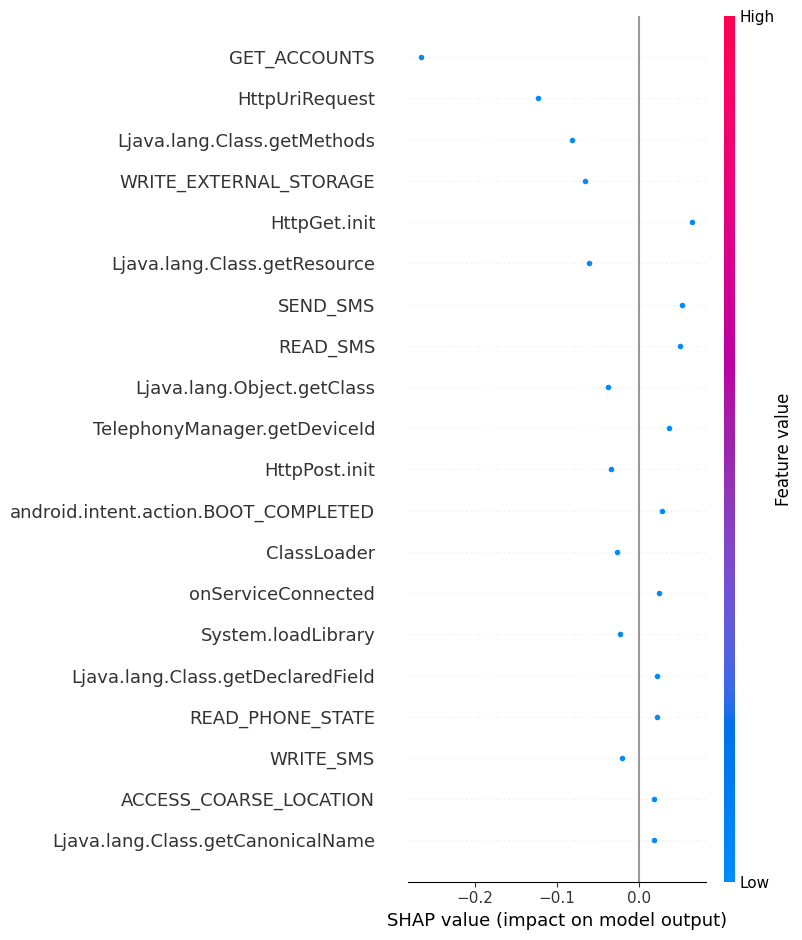

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import shap

# Load your dataset
dataset_df = pd.read_csv('/content/new_dataset_rf (1).csv')

# Preprocess your data and split into features (X) and labels (Y)
Y = dataset_df['class']
X = dataset_df.drop(['class'], axis=1)

encoder = LabelEncoder().fit(Y)
Y = encoder.transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
features = X.columns
num_features = len(features)

# Define and train your Keras model using the TensorFlow backend
AN = tf.keras.Sequential()
AN.add(tf.keras.layers.Dense(256, activation='relu', input_dim=num_features))
AN.add(tf.keras.layers.Dropout(0.2))
AN.add(tf.keras.layers.Dense(128, activation='relu'))
AN.add(tf.keras.layers.Dropout(0.2))
AN.add(tf.keras.layers.Dense(128, activation='relu'))
AN.add(tf.keras.layers.Dropout(0.2))
AN.add(tf.keras.layers.Dense(32, activation='relu'))
AN.add(tf.keras.layers.Dropout(0.2))
AN.add(tf.keras.layers.Dense(1, activation='sigmoid'))
AN.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
AN.fit(X_train, y_train, epochs=100, batch_size=32)

# Convert your data to NumPy arrays for predictions
X_test_array = X_test.to_numpy()

# Use your Keras model to predict
predicted_probabilities = AN.predict(X_test_array)

# Calculate and print the classification report
y_pred = AN.predict(X_test_array)
y_pred_binary = (y_pred > 0.5).astype(int)

report = classification_report(y_test, y_pred_binary, target_names=['benign', 'malign'])
print(report)

# Create an explainer for your Keras model
explainer = shap.Explainer(AN, X_train.to_numpy())

# Select an instance from the test set for explanation
instance_idx = 0  # Choose any index
instance_to_explain = X_test_array[[instance_idx]]

# Explain the predictions for the selected instance
shap_values = explainer.shap_values(instance_to_explain)

# Display the SHAP values for the instance with feature names
shap.summary_plot(shap_values, instance_to_explain, feature_names=features)


**RANDOM FOREST - Long Short-Term Memory (LSTM)**

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load your dataset
# Assuming you have a column named 'class' for binary classification and numerical features
dataset_df = pd.read_csv('/content/new_dataset_rf (1).csv')

# Assuming you have a column named 'class' for binary classification
Y = dataset_df['class']
X_numerical = dataset_df.drop(['class'], axis=1)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numerical, Y, test_size=0.2, random_state=42)

# Build LSTM model
embedding_dim = 50  # Adjust based on your data
lstm_units = 50  # Adjust based on your data

model = Sequential()
model.add(LSTM(units=lstm_units, input_shape=(X_train.shape[1], 1)))  # Assuming you have one feature per time step
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape the input data for LSTM
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Apply a threshold (e.g., 0.5) for binary classification
print(classification_report(y_test, y_pred))


Epoch 1/10
301/301 [==============================] - 9s 24ms/step - loss: 0.6304 - accuracy: 0.6180 - val_loss: 0.5952 - val_accuracy: 0.6313
Epoch 2/10
301/301 [==============================] - 6s 21ms/step - loss: 0.5517 - accuracy: 0.6511 - val_loss: 0.5313 - val_accuracy: 0.7311
Epoch 3/10
301/301 [==============================] - 6s 21ms/step - loss: 0.4972 - accuracy: 0.7502 - val_loss: 0.4763 - val_accuracy: 0.7731
Epoch 4/10
301/301 [==============================] - 7s 24ms/step - loss: 0.4604 - accuracy: 0.7878 - val_loss: 0.4558 - val_accuracy: 0.7768
Epoch 5/10
301/301 [==============================] - 6s 20ms/step - loss: 0.4494 - accuracy: 0.7977 - val_loss: 0.4524 - val_accuracy: 0.7993
Epoch 6/10
301/301 [==============================] - 7s 23ms/step - loss: 0.4292 - accuracy: 0.8165 - val_loss: 0.4087 - val_accuracy: 0.8446
Epoch 7/10
301/301 [==============================] - 6s 20ms/step - loss: 0.3996 - accuracy: 0.8455 - val_loss: 0.3127 - val_accuracy: 0.8874

**TOP FEATURE SELECTION**

In [ ]:
feature_importance = np.abs(shap_values).mean(axis=0)

# Get the indices of the features sorted by importance
sorted_feature_indices = np.argsort(feature_importance)[::-1]

# Print the top most feature
top_feature_index = sorted_feature_indices[0]
top_feature_name = X_test.columns[top_feature_index]
print(f"Top most important feature: {top_feature_name}")


Top most important feature: bindService
